In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install surprise
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
from surprise import KNNBasic,  KNNWithMeans, KNNBaseline
from surprise.model_selection import KFold
import seaborn as sns
import gzip
from ast import literal_eval
import gzip
import pandas as pd
from pandas import Grouper
import json
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import re
import matplotlib.pyplot as plt
import nltk
import requests
from io import BytesIO
import numpy as np
nltk.download('stopwords')
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
from nltk.tokenize import RegexpTokenizer
import string
import random
from plotly.offline import init_notebook_mode, iplot
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from gensim.models import KeyedVectors
from nltk.stem import PorterStemmer
import seaborn as sns
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('punkt')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
import seaborn as sns
import ipywidgets
from surprise import SVD
from surprise import KNNBaseline
from surprise.model_selection import train_test_split
from surprise.model_selection import LeaveOneOut
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from ipywidgets import interact
from ipywidgets import interact_manual
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
N = 10000
data_reviews = []
with gzip.open('/content/drive/Shareddrives/rs assignment1/reviews.clean.json/reviews.clean.json.gz') as f:
    head = [next(f) for x in range(N)]
    for l in head:
        data_reviews.append(eval(l))

In [ ]:
data_places = []

with gzip.open('/content/drive/Shareddrives/rs assignment1/reviews.clean.json/places.clean.json.gz') as f:
  head = [next(f) for x in range(N)]
  for l in head:
    data_places.append(eval(l))
        

In [ ]:
data_users = []

with gzip.open('/content/drive/Shareddrives/rs assignment1/reviews.clean.json/users.clean.json.gz') as f:
  head = [next(f) for x in range(N)]
  for l in head:
    data_places.append(eval(l))

In [ ]:
df_users = pd.DataFrame.from_dict(data_users)

In [ ]:
df_reviews = pd.DataFrame.from_dict(data_reviews)
df_reviews["reviewText"] = df_reviews["reviewText"].fillna("No review")

In [ ]:
df_pl = pd.DataFrame.from_dict(data_places)
df_pl.head()
df_pl.columns


Index(['name', 'price', 'address', 'hours', 'phone', 'closed', 'gPlusPlaceId',
       'gps', 'userName', 'jobs', 'currentPlace', 'previousPlaces',
       'education', 'gPlusUserId'],
      dtype='object')

**Data Analysis**

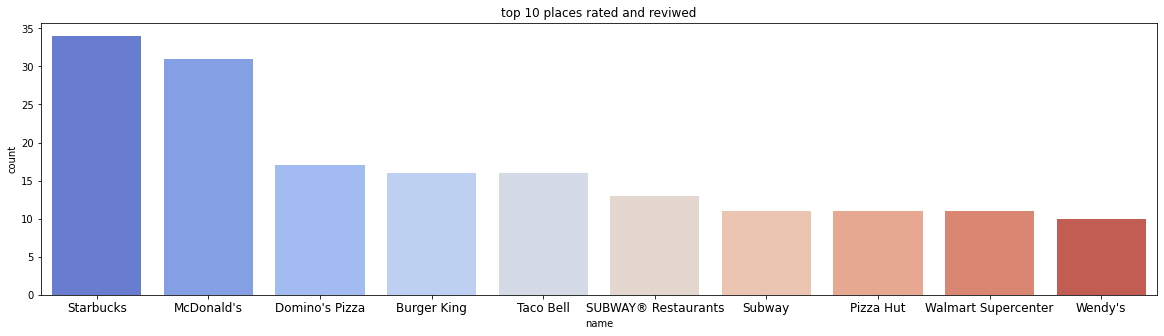

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'name', data = df_pl,order = df_pl['name'].value_counts().iloc[:10].index,palette = 'coolwarm')
plt.title("top 10 places rated and reviwed")
plt.xticks(fontsize = 12)
plt.show()

**Merging reviews and places**

In [ ]:
df_places = pd.merge(df_reviews,df_pl[['gPlusPlaceId','name','price','address']], on = 'gPlusPlaceId')
df_places.head()



,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,address
0,3.000,JiCk Li,No review,"[Japanese Restaurant, Delivery Restaurant]",110500330352717311282,1375901666.000,"Aug 7, 2013",100000849267596620071,香港爭鮮外帶壽司-油塘店,None,"[38 Ko Chiu Rd, Hong Kong]"
1,5.000,Tyler Houghton,No review,"[Fast Food Restaurant, Sandwich Shop]",103714580490074430382,1394854209.000,"Mar 14, 2014",100001045668680522107,Sub Depot,None,"[6100 Fair Oaks Blvd, Carmichael, CA 95608]"
2,5.000,Amalya Gaziyeva,Самая лучшая школа но питание нада улучшить...,[Education],101104896395971745217,1365577161.000,"Apr 9, 2013",100001120138879811669,Частная школа Парвоз,None,"[Урта-шура махалля, Фергана, Uzbekistan]"
3,2.000,chi ping liao,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,"[Chinese Restaurant, Asian Restaurant, Dim Sum...",105091380358020461253,1333766072.000,"Apr 6, 2012",100001176398972193069,陳記狀元粥舖,None,"[970, Taiwan, Hualien County, Hualian City, 軒轅..."
4,5.000,didy Carlsons,I wouldn't waste a second recommending any oth...,"[General Contractor, Kitchen Remodeler, Home B...",114126471431611954577,1380295370.000,"Sep 27, 2013",100001198443299553241,Horizon Homes & Remodeling Co Inc,None,"[Sweet Auburn, Atlanta, GA]"


In [ ]:
df_places.isnull().sum()


rating             0
reviewerName       0
reviewText         0
categories         4
gPlusPlaceId       0
unixReviewTime     4
reviewTime         4
gPlusUserId        0
name               0
price             32
address            0
dtype: int64

In [ ]:
df_places['price'] = df_places['price'].fillna(df_places['price'].mode()[0])
df_places.isnull().sum()

rating            0
reviewerName      0
reviewText        0
categories        4
gPlusPlaceId      0
unixReviewTime    4
reviewTime        4
gPlusUserId       0
name              0
price             0
address           0
dtype: int64

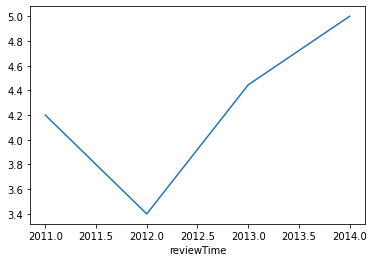

In [ ]:
df_places["reviewTime"] = pd.to_datetime(df_places["reviewTime"])
df_places.groupby(df_places["reviewTime"].dt.year).mean()["rating"].plot()

In [ ]:
labels = list(df_places.name.value_counts().index)
values = list(df_places.name.value_counts().values)
fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Places distribution around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Places",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig)

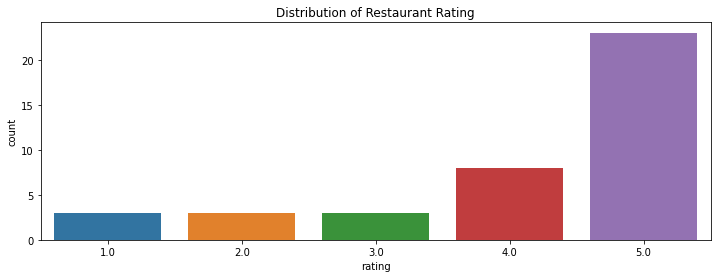

In [ ]:
plt.figure(figsize=(12,4))
ax = sns.countplot(df_places['rating'])
plt.title('Distribution of Restaurant Rating');

In [ ]:
df_places["dtime"] = pd.to_datetime(df_places["unixReviewTime"], unit="s")

df_places["hour"] = df_places.dtime.dt.hour
df_places["minute"] = df_places.dtime.dt.minute
df_places["second"] = df_places.dtime.dt.second

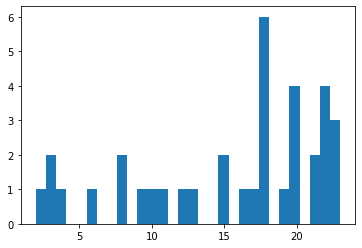

In [ ]:
plt.hist(df_places["hour"], bins=30)
plt.show()

In [ ]:
review_count = pd.DataFrame(df_places["hour"].value_counts())
review_count["hr"] = review_count.index
review_count.reset_index
review_count = review_count.rename(columns={"hour": "num_reviews"}).sort_values(
    by=["hr"]
)

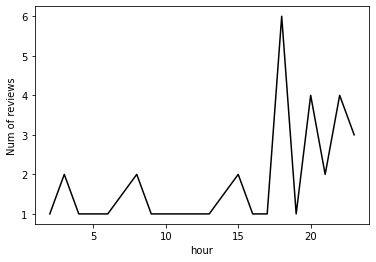

In [ ]:
plt.plot((review_count["hr"]), review_count["num_reviews"], color="black")
plt.xlabel("hour")
plt.ylabel("Num of reviews")
# plt.legend()
plt.show()

In [ ]:
df_places["review_length"] = df_places["reviewText"].str.len()
df_places[["rating", "review_length"]].corr()

,rating,review_length
rating,1.000,-0.217
review_length,-0.217,1.000


In [ ]:
df_places["gPlusUserId"].value_counts()

100002870366309555032    3
100010291864038208984    2
100000849267596620071    1
100012150294651056876    1
100008066355678629377    1
100008176682616801686    1
100010744187731590926    1
100011407742827869341    1
100011558799201004078    1
100012673316747548067    1
100006553807417850183    1
100012799184161101041    1
100013729099572680462    1
100013881505265665932    1
100014354462672423179    1
100014523492454428966    1
100014655088126697770    1
100014792527301939900    1
100006765738867846741    1
100006341440782514861    1
100001045668680522107    1
100002025885689800480    1
100001120138879811669    1
100001176398972193069    1
100001198443299553241    1
100001312769136834086    1
100001498208653159507    1
100001608220446825169    1
100002422548155634137    1
100005947076026260213    1
100002748595197919391    1
100003840837471130074    1
100004520311858937835    1
100005133317719946114    1
100005559409353659035    1
100005863274426798192    1
100014808696256719518    1
N

**Feature extraction on reviewtext**

In [ ]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
review_text = df_places["reviewText"].tolist()
sentiments = []
for text in review_text:
    if text is not None:
        sentiment = SentimentIntensityAnalyzer().polarity_scores(text)["compound"]
        sentiments.append(sentiment)
    else:
        sentiments.append(None)

df_places["sentiment"] = sentiments
df_places.head(40)

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,address,dtime,hour,minute,second,review_length,sentiment
0,3.000,JiCk Li,No review,"[Japanese Restaurant, Delivery Restaurant]",110500330352717311282,1375901666.000,2013-08-07,100000849267596620071,香港爭鮮外帶壽司-油塘店,$$,"[38 Ko Chiu Rd, Hong Kong]",2013-08-07 18:54:26,18.000,54.000,26.000,9,-0.296
1,5.000,Tyler Houghton,No review,"[Fast Food Restaurant, Sandwich Shop]",103714580490074430382,1394854209.000,2014-03-14,100001045668680522107,Sub Depot,$$,"[6100 Fair Oaks Blvd, Carmichael, CA 95608]",2014-03-15 03:30:09,3.000,30.000,9.000,9,-0.296
2,5.000,Amalya Gaziyeva,Самая лучшая школа но питание нада улучшить...,[Education],101104896395971745217,1365577161.000,2013-04-09,100001120138879811669,Частная школа Парвоз,$$,"[Урта-шура махалля, Фергана, Uzbekistan]",2013-04-10 06:59:21,6.000,59.000,21.000,46,0.000
3,2.000,chi ping liao,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,"[Chinese Restaurant, Asian Restaurant, Dim Sum...",105091380358020461253,1333766072.000,2012-04-06,100001176398972193069,陳記狀元粥舖,$$,"[970, Taiwan, Hualien County, Hualian City, 軒轅...",2012-04-07 02:34:32,2.000,34.000,32.000,24,0.000
4,5.000,didy Carlsons,I wouldn't waste a second recommending any oth...,"[General Contractor, Kitchen Remodeler, Home B...",114126471431611954577,1380295370.000,2013-09-27,100001198443299553241,Horizon Homes & Remodeling Co Inc,$$,"[Sweet Auburn, Atlanta, GA]",2013-09-27 15:22:50,15.000,22.000,50.000,413,0.983
5,5.000,Ali Gokcek,Oncelikle mekan: Ehl-i kebap siradan bir kebab...,[Restaurant],111349535627765676111,1369845770.000,2013-05-29,100001312769136834086,Ehli Kebap,$$,"[İskender Paşa Mh., 34091 Fatih/İstanbul, Turkey]",2013-05-29 16:42:50,16.000,42.000,50.000,1396,0.000
6,5.000,Adrian Villarreal,From start to finish the experience was great!...,"[Chevrolet Dealer, Used Car Dealer, Used Truck...",108635188508183406899,1372247991.000,2013-06-26,100001498208653159507,Jim Glover Chevrolet,$$,"[8308 NW Cache Rd, Lawton, OK 73505]",2013-06-26 11:59:51,11.000,59.000,51.000,226,0.930
7,5.000,Kale Kinna,Good memories after nearly 45 years plus my pr...,"[Steak House, Seafood Restaurant, Wedding Venue]",115757957627721988675,1367353743.000,2013-04-30,100001608220446825169,Tropical Acres Steakhouse,$$,"[2500 Griffin Rd, Fort Lauderdale, FL 33312]",2013-04-30 20:29:03,20.000,29.000,3.000,58,0.440
8,2.000,Jocelyn C,1 star for friendliness and communication. DO ...,[Apartment Building],115681624071942929705,1344549074.000,2012-08-09,100002025885689800480,Munson Hill Towers,$$,"[6129 Leesburg Pike, Falls Church, VA 22041]",2012-08-09 21:51:14,21.000,51.000,14.000,2696,-0.904
9,5.000,Dan Ireland,"Best park around. Off leash area ""Freedom Bark...",[Park],108732336632274489572,1380740532.000,2013-10-02,100002422548155634137,Medford Park,$$,"[Medford, NJ 08055]",2013-10-02 19:02:12,19.000,2.000,12.000,128,0.939


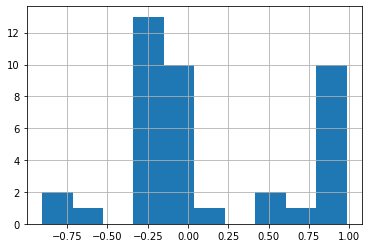

In [ ]:
df_places["sentiment"].hist()


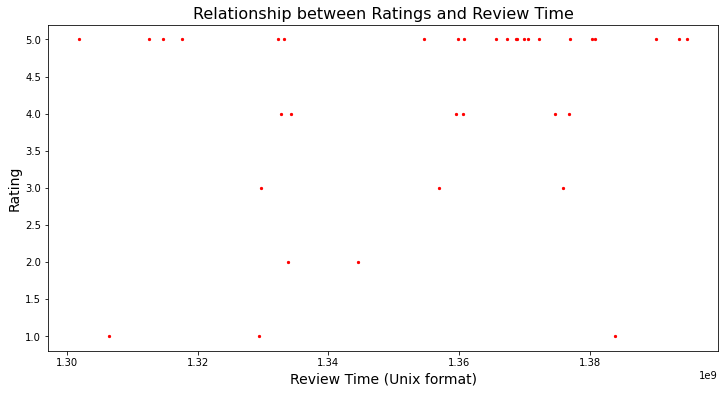

In [ ]:
# Use Matplotlib to create a scatter plot of ratings vs unixReviewTime
plt.figure(figsize=(12, 6))
plt.scatter(df_places['unixReviewTime'], df_places['rating'], color='red', s=5)
plt.title('Relationship between Ratings and Review Time', fontsize=16)
plt.xlabel('Review Time (Unix format)', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.show()

In [ ]:
def sentiment(rating):
    if rating < 3:
        return "Negative"
    else:
        return "Positive"

df_places["review_sentiment"] = df_places["rating"].apply(sentiment)

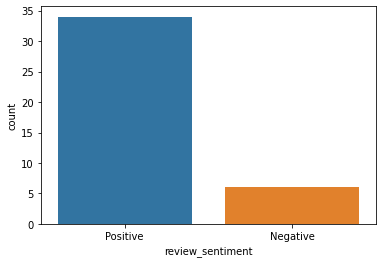

In [ ]:
sns.countplot(x='review_sentiment', data=df_places)

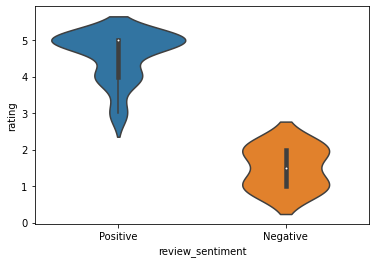

In [ ]:
sns.violinplot(x='review_sentiment', y='rating', data=df_places)

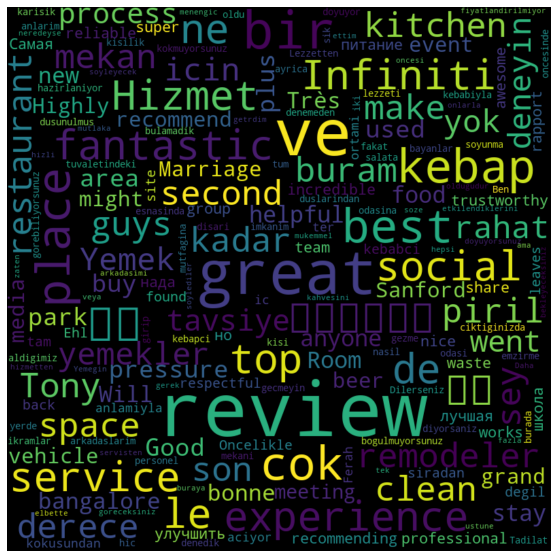

In [ ]:
positive_reviews = df_places[df_places['review_sentiment'] == 'Positive']['reviewText'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(positive_reviews)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
nlp = spacy.load("en_core_web_sm")
df_places_copy = df_places.copy()
df_places_copy.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,address,dtime,hour,minute,second,review_length,sentiment,review_sentiment
0,3.000,JiCk Li,No review,"[Japanese Restaurant, Delivery Restaurant]",110500330352717311282,1375901666.000,2013-08-07,100000849267596620071,香港爭鮮外帶壽司-油塘店,$$,"[38 Ko Chiu Rd, Hong Kong]",2013-08-07 18:54:26,18.000,54.000,26.000,9,-0.296,Positive
1,5.000,Tyler Houghton,No review,"[Fast Food Restaurant, Sandwich Shop]",103714580490074430382,1394854209.000,2014-03-14,100001045668680522107,Sub Depot,$$,"[6100 Fair Oaks Blvd, Carmichael, CA 95608]",2014-03-15 03:30:09,3.000,30.000,9.000,9,-0.296,Positive
2,5.000,Amalya Gaziyeva,Самая лучшая школа но питание нада улучшить...,[Education],101104896395971745217,1365577161.000,2013-04-09,100001120138879811669,Частная школа Парвоз,$$,"[Урта-шура махалля, Фергана, Uzbekistan]",2013-04-10 06:59:21,6.000,59.000,21.000,46,0.000,Positive
3,2.000,chi ping liao,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,"[Chinese Restaurant, Asian Restaurant, Dim Sum...",105091380358020461253,1333766072.000,2012-04-06,100001176398972193069,陳記狀元粥舖,$$,"[970, Taiwan, Hualien County, Hualian City, 軒轅...",2012-04-07 02:34:32,2.000,34.000,32.000,24,0.000,Negative
4,5.000,didy Carlsons,I wouldn't waste a second recommending any oth...,"[General Contractor, Kitchen Remodeler, Home B...",114126471431611954577,1380295370.000,2013-09-27,100001198443299553241,Horizon Homes & Remodeling Co Inc,$$,"[Sweet Auburn, Atlanta, GA]",2013-09-27 15:22:50,15.000,22.000,50.000,413,0.983,Positive


In [ ]:
df_places_copy['reviewText'] = df_places_copy['reviewText'].astype(str)

In [ ]:
text = df_places_copy['reviewText']

In [ ]:
text

0                                             No review
1                                             No review
2        Самая лучшая школа но питание нада улучшить...
3                              很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。
4     I wouldn't waste a second recommending any oth...
5     Oncelikle mekan: Ehl-i kebap siradan bir kebab...
6     From start to finish the experience was great!...
7     Good memories after nearly 45 years plus my pr...
8     1 star for friendliness and communication. DO ...
9     Best park around. Off leash area "Freedom Bark...
10    I actually went there to buy a used Chevy Cama...
11    Harrods is probably the best place in London t...
12                                            No review
13                                            No review
14                                            No review
15                                            No review
16    Would not recomment this restaurant to anyone ...
17    Good Infra and service.. best stay at naha

In [ ]:
def process_text(text):
    doc = nlp(text)
    for sent in doc.sents:
        print(">", sent, sent.start, sent.end)

doc = df_places_copy['reviewText'].apply(process_text)


> No review 0 2
> No review 0 2
> Самая лучшая школа но питание нада улучшить... 0 8
> 很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。 0 2
> I wouldn't waste a second recommending any other kitchen remodeler than Tony. 0 14
> On top of being an incredible professional himself, he works with a great group of guys and the rapport that they share make them an awesome team.   14 44
> Tony is reliable, trustworthy,  and a super nice kitchen remodeler. 44 58
> He's respectful of your space, and leaves the site as clean as he found it. 58 76
> I'd have him back to our place in a second. 76 88
> Oncelikle mekan: Ehl-i kebap siradan bir kebabci degil, tam anlamiyla bir restaurant. 0 17
> Ferah ortami ic aciyor, kebap ve ter kokusundan bogulmuyorsunuz; disari ciktiginizda buram buram kebap kokmuyorsunuz. 17 35
> Tadilat esnasinda tum mekani gezme imkanim oldu, personel soyunma odasi ve duslarindan bayanlar tuvaletindeki emzirme odasina kadar her sey dusunulmus, son derece sik ve piril piril. 35 64
> Dilerseniz mutfagi

In [ ]:
def extract_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(ent, ent.label_)

df_places_copy['reviewText'].apply(extract_entities)

питание нада ORG
second ORDINAL
Tony PERSON
Tony PERSON
second ORDINAL
siradan GPE
kebabci degil ORG
Ferah GPE
kokusundan bogulmuyorsunuz PERSON
disari ciktiginizda PERSON
kebap kokmuyorsunuz PERSON
duslarindan bayanlar tuvaletindeki emzirme PERSON
nasil hazirlaniyor gorebiliyorsunuz ORG
Yemekler PERSON
Ben PERSON
yerde bulamadik PERSON
Lezzetten GPE
denemeden gecmeyin PERSON
Yemek GPE
yemek oncesi PERSON
Yemegin ORG
kahvesini mutlaka deneyin ORG
Daha PERSON
yok ORG
Hizmet PERSON
tek sey mukemmel ORG
arkadasimi buraya getrdim veya PERSON
asiri bekleme yok ORG
takip GPE
eden birileri var ORG
Mekan sahipleri de son PERSON
karsilayip yolcu PERSON
nearly 45 years DATE
1 CARDINAL
5:35pm CARDINAL
6pm TIME
10 minutes TIME
about 15 CARDINAL
6pm TIME
15 minutes TIME
530pm PRODUCT
5pm TIME
5:30pm CARDINAL
another day DATE
Munson PERSON
15 minutes TIME
Roosevelt PERSON
less than 20 CARDINAL
Munson PERSON
5-10 minutes TIME
A few seconds TIME
5:35pm MONEY
a couple minutes late TIME
Freedom Barks WO

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
Name: reviewText, dtype: object

In [ ]:
def process_text(text):
    doc = nlp(text)
    for sent in doc.sents:
        for tok in sent:
            print(tok, tok.lemma_, spacy.explain(tok.pos_), tok.is_stop)
        break

df_places_copy['reviewText'].apply(process_text)

No no determiner True
review review noun False
No no determiner True
review review noun False
Самая самая adjective False
лучшая лучшая noun False
школа школа noun False
но но proper noun False
питание питание proper noun False
нада нада proper noun False
улучшить улучшить proper noun False
... ... punctuation False
很多料加在同一碗粥裡，賣的很貴，但味道根本不搭 很多料加在同一碗粥裡，賣的很貴，但味道根本不搭 verb False
。 。 noun False
I I pronoun True
would would auxiliary True
n't not particle True
waste waste verb False
a a determiner True
second second adjective False
recommending recommend verb False
any any determiner True
other other adjective True
kitchen kitchen noun False
remodeler remodeler noun False
than than adposition True
Tony Tony proper noun False
. . punctuation False
Oncelikle oncelikle adjective False
mekan mekan proper noun False
: : punctuation False
Ehl Ehl proper noun False
- - proper noun False
i i proper noun True
kebap kebap proper noun False
siradan siradan proper noun False
bir bir proper noun False
keb

0     None
1     None
2     None
3     None
4     None
5     None
6     None
7     None
8     None
9     None
10    None
11    None
12    None
13    None
14    None
15    None
16    None
17    None
18    None
19    None
20    None
21    None
22    None
23    None
24    None
25    None
26    None
27    None
28    None
29    None
30    None
31    None
32    None
33    None
34    None
35    None
36    None
37    None
38    None
39    None
Name: reviewText, dtype: object

In [ ]:
import spacy
from spacy import displacy

In [ ]:
def process_text(text):
    doc = nlp(text)
    for sent in doc.sents:
        displacy.render(sent, style='dep', jupyter=True)
        break
    return doc

df_places_copy['reviewText'].apply(process_text)

0                                          (No, review)
1                                          (No, review)
2     (Самая, лучшая, школа, но, питание, нада, улуч...
3                          (很多料加在同一碗粥裡，賣的很貴，但味道根本不搭, 。)
4     (I, would, n't, waste, a, second, recommending...
5     (Oncelikle, mekan, :, Ehl, -, i, kebap, sirada...
6     (From, start, to, finish, the, experience, was...
7     (Good, memories, after, nearly, 45, years, plu...
8     (1, star, for, friendliness, and, communicatio...
9     (Best, park, around, ., Off, leash, area, ", F...
10    (I, actually, went, there, to, buy, a, used, C...
11    (Harrods, is, probably, the, best, place, in, ...
12                                         (No, review)
13                                         (No, review)
14                                         (No, review)
15                                         (No, review)
16    (Would, not, recomment, this, restaurant, to, ...
17    (Good, Infra, and, service, .., best, stay

In [ ]:
def convert_to_string(x):
    if x is None:
        return ""
    return ','.join([str(i) for i in x])

In [ ]:
df_places['categories'] = df_places['categories'].apply(convert_to_string)
df_places['categories'] = df_places['categories'].apply(lambda x: x.split(','))
df_places['categories'] = df_places['categories'].apply(lambda x: x[0] if x else '')
df_places.head()


,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,address,dtime,hour,minute,second,review_length,sentiment,review_sentiment
0,3.000,JiCk Li,No review,Japanese Restaurant,110500330352717311282,1375901666.000,2013-08-07,100000849267596620071,香港爭鮮外帶壽司-油塘店,$$,"[38 Ko Chiu Rd, Hong Kong]",2013-08-07 18:54:26,18.000,54.000,26.000,9,-0.296,Positive
1,5.000,Tyler Houghton,No review,Fast Food Restaurant,103714580490074430382,1394854209.000,2014-03-14,100001045668680522107,Sub Depot,$$,"[6100 Fair Oaks Blvd, Carmichael, CA 95608]",2014-03-15 03:30:09,3.000,30.000,9.000,9,-0.296,Positive
2,5.000,Amalya Gaziyeva,Самая лучшая школа но питание нада улучшить...,Education,101104896395971745217,1365577161.000,2013-04-09,100001120138879811669,Частная школа Парвоз,$$,"[Урта-шура махалля, Фергана, Uzbekistan]",2013-04-10 06:59:21,6.000,59.000,21.000,46,0.000,Positive
3,2.000,chi ping liao,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,Chinese Restaurant,105091380358020461253,1333766072.000,2012-04-06,100001176398972193069,陳記狀元粥舖,$$,"[970, Taiwan, Hualien County, Hualian City, 軒轅...",2012-04-07 02:34:32,2.000,34.000,32.000,24,0.000,Negative
4,5.000,didy Carlsons,I wouldn't waste a second recommending any oth...,General Contractor,114126471431611954577,1380295370.000,2013-09-27,100001198443299553241,Horizon Homes & Remodeling Co Inc,$$,"[Sweet Auburn, Atlanta, GA]",2013-09-27 15:22:50,15.000,22.000,50.000,413,0.983,Positive


(-1.1000000234476428,
 1.100000008254026,
 -1.1005081865973514,
 1.1106717836461495)

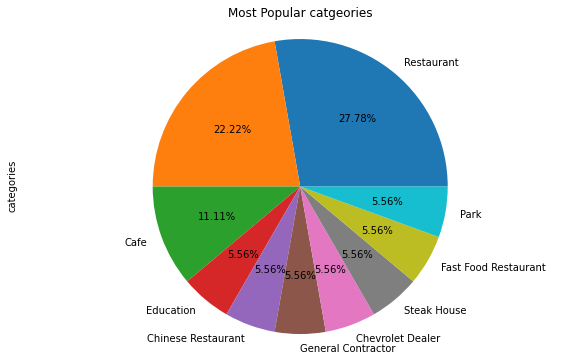

In [ ]:
df_places['categories'].value_counts().sort_values(ascending=False).head(10)
df_places['categories'].value_counts().sort_values(ascending=False).head(10).plot(kind='pie',figsize=(10,6), 
title="Most Popular catgeories", autopct='%1.2f%%')
plt.axis('equal')

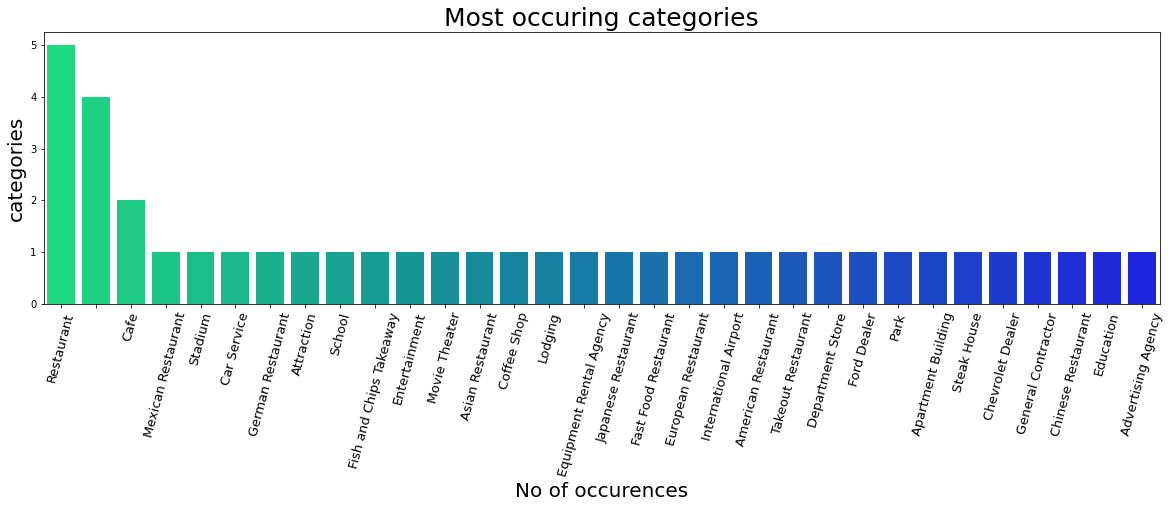

In [ ]:
plt.figure(figsize = (20,5))
categories = df_places['categories'].value_counts()
sns.barplot(y = categories,x = categories.index,palette = 'winter_r')
plt.title("Most occuring categories",fontsize = 25)
plt.xlabel("No of occurences",fontsize = 20)
plt.ylabel("categories",fontsize = 20)
plt.xticks(rotation = 75,fontsize = 13)
plt.show()

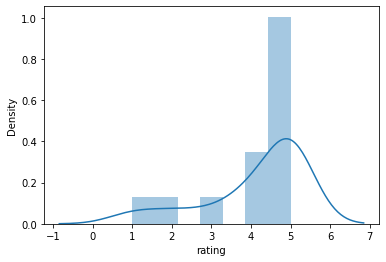

In [ ]:
sns.distplot(df_places['rating'])
plt.show()

In [ ]:
df_places[df_places.rating == df_places.rating.max()][['name','reviewerName','rating','categories','reviewText','price']]

,name,reviewerName,rating,categories,reviewText,price
1,Sub Depot,Tyler Houghton,5.000,Fast Food Restaurant,No review,$$
2,Частная школа Парвоз,Amalya Gaziyeva,5.000,Education,Самая лучшая школа но питание нада улучшить...,$$
4,Horizon Homes & Remodeling Co Inc,didy Carlsons,5.000,General Contractor,I wouldn't waste a second recommending any oth...,$$
5,Ehli Kebap,Ali Gokcek,5.000,Restaurant,Oncelikle mekan: Ehl-i kebap siradan bir kebab...,$$
6,Jim Glover Chevrolet,Adrian Villarreal,5.000,Chevrolet Dealer,From start to finish the experience was great!...,$$
7,Tropical Acres Steakhouse,Kale Kinna,5.000,Steak House,Good memories after nearly 45 years plus my pr...,$$
9,Medford Park,Dan Ireland,5.000,Park,"Best park around. Off leash area ""Freedom Bark...",$$
10,Winner Ford,Kelly Fox,5.000,Ford Dealer,I actually went there to buy a used Chevy Cama...,$$
11,Harrods,Mitesh Shanbhag,5.000,Department Store,Harrods is probably the best place in London t...,
14,Q Restaurant and Wine Bar,Rick Casady,5.000,American Restaurant,No review,$$


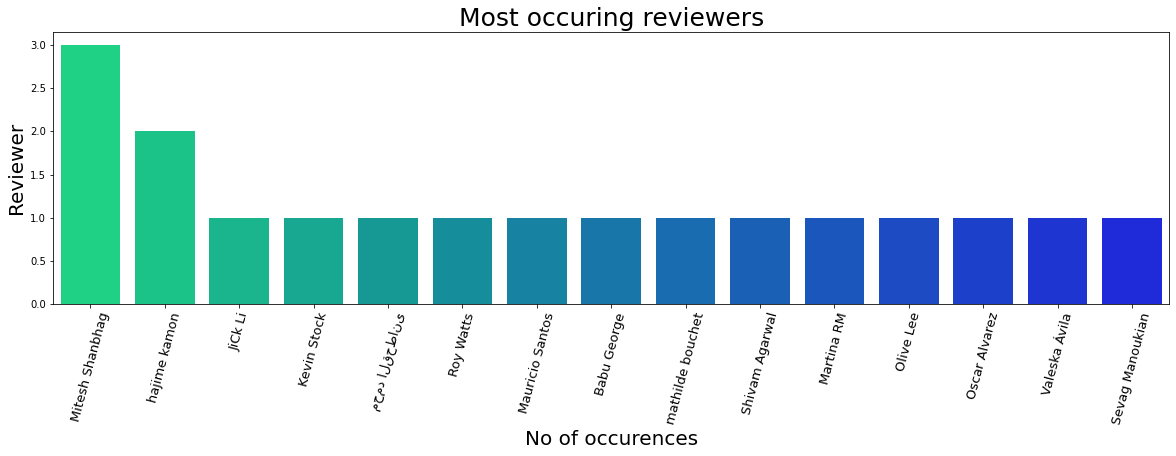

In [ ]:
plt.figure(figsize = (20,5))
reviewerName = df_places['reviewerName'].value_counts()[:15]
sns.barplot(y = reviewerName,x = reviewerName.index,palette = 'winter_r')
plt.title("Most occuring reviewers",fontsize = 25)
plt.xlabel("No of occurences",fontsize = 20)
plt.ylabel("Reviewer",fontsize = 20)
plt.xticks(rotation = 75,fontsize = 13)
plt.show()


In [ ]:
df_places['reviewText'] = df_places['reviewText'].str.lower()
df_places['reviewerName'] = df_places['reviewerName'].str.lower()
df_places['categories'] = df_places['categories'].str.lower()
df_places['name'] = df_places['name'].str.lower()

In [ ]:
df_places['price'].unique()

array(['$$', '', '$$$'], dtype=object)

In [ ]:
df_places['price'].replace(['$', '$$ - $$$', '$$$$'], ['cheap-eats', 'mid-range', 'fine-dining'], inplace=True)

**ReviewText preprocessing**

In [ ]:
df_places["reviewText"] = df_places["reviewText"].astype(str)
stemmer_ps = PorterStemmer()  

In [ ]:
def non_ascii(s):
    return "".join(i for i in s if ord(i)<128)
def lower(text):
    return text.lower()
def stop_words(text):
    text = text.split() # split tokens to find stopwords
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = "".join(text)
    # join into string after removing stop words
    return text
def clean_html(text):
    html = re.compile('<.*?>') # regex
    return html.sub(r'',text)
def punct(text):
    token = RegexpTokenizer(r'\w+') # regex
    text = token.tokenize(text)
    text = " ".join(text)
    return text
def stemSentence(sentence):
    token_words=word_tokenize(sentence) #we need to tokenize the sentence or else stemming will return the entire sentence as is.
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer_ps.stem(word))
        stem_sentence.append(" ") #adding a space so that we can join all the words at the end to form the sentence again.
    return "".join(stem_sentence)

In [ ]:
df_places["processed_review"] = df_places["reviewText"].apply(non_ascii)
df_places["processed_review"] = df_places["processed_review"].fillna("No review")
df_places["processed_review"] = df_places["processed_review"].apply(func = lower)
df_places["processed_review"] = df_places["processed_review"].apply(func = stop_words)
df_places["processed_review"] = df_places["processed_review"].apply(func = clean_html)
df_places["processed_review"] = df_places["processed_review"].apply(func = punct)
df_places["stemm_review"] = df_places["processed_review"].apply(func = stemSentence)



In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def process_sentences(text):
    temp_sent =[]

    # Tokenize words
    words = nltk.word_tokenize(text)

    # Lemmatize each of the words based on their position in the sentence
    tags = nltk.pos_tag(words)
    for i, word in enumerate(words):
        if tags[i][1] in ('VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'):  # only verbs
            lemmatized = lemmatizer.lemmatize(word, 'v')
        else:
            lemmatized = lemmatizer.lemmatize(word)
        
        # Remove stop words and non alphabet tokens
        if lemmatized not in stop_words and lemmatized.isalpha(): 
            temp_sent.append(lemmatized)

    # Some other clean-up
    full_sentence = ' '.join(temp_sent)
    full_sentence = full_sentence.replace("n't", " not")
    full_sentence = full_sentence.replace("'m", " am")
    full_sentence = full_sentence.replace("'s", " is")
    full_sentence = full_sentence.replace("'re", " are")
    full_sentence = full_sentence.replace("'ll", " will")
    full_sentence = full_sentence.replace("'ve", " have")
    full_sentence = full_sentence.replace("'d", " would")
    return full_sentence

In [ ]:
df_places['processed_review'] = df_places['processed_review'].apply(process_sentences)

In [ ]:
df_places['categories_processed'] = df_places['categories'].apply(process_sentences)

In [ ]:
df_places[['reviewText', 'processed_review', 'categories', 'categories_processed']].sample(5)

,reviewText,processed_review,categories,categories_processed
16,would not recomment this restaurant to anyone ...,wouldrecommentrestaurantanyonevisiting service...,european restaurant,european restaurant
10,i actually went there to buy a used chevy cama...,actuallywentbuyusedchevycamaroguysfantasticwho...,ford dealer,ford dealer
39,"as an enormous social media firm, it's great t...",enormoussocialmediafirm greatlayoutplacedefini...,advertising agency,advertising agency
11,harrods is probably the best place in london t...,harrodsprobablybestplacelondonwander getlostma...,department store,department store
18,no review,review,mexican restaurant,mexican restaurant


In [ ]:
df_places['bag_of_words'] = df_places['categories_processed'] + ' ' + df_places['processed_review']
display('Sample of bag_of_words attribute', df_places[['categories', 'reviewText' ,'bag_of_words']].sample(5))

'Sample of bag_of_words attribute'

,categories,reviewText,bag_of_words
23,lodging,اقامة لا تنسى حجزت فى الفندق عشر ايام مع العا...,lodge
32,attraction,超推雙連切仔麵，服務超親切，茶鵝好吃~,attraction
6,chevrolet dealer,from start to finish the experience was great!...,chevrolet dealer startfinishexperiencegreat wi...
26,restaurant,のが良い,restaurant
1,fast food restaurant,no review,fast food restaurant review


In [ ]:
price_map = {
    'cheap-eats': ('cheap', 'inexpensive', 'low-price', 'low-cost', 'economical',
                   'economic', 'affordable'),
    'mid-range': ('moderate', 'fair', 'mid-price', 'reasonable', 'average'),
    'fine-dining': ('expensive', 'fancy', 'lavish')
}

In [ ]:
df_places.columns

Index(['rating', 'reviewerName', 'reviewText', 'categories', 'gPlusPlaceId',
       'unixReviewTime', 'reviewTime', 'gPlusUserId', 'name', 'price',
       'address', 'dtime', 'hour', 'minute', 'second', 'review_length',
       'sentiment', 'review_sentiment', 'processed_review', 'stemm_review',
       'categories_processed', 'bag_of_words'],
      dtype='object')

**Recommendation on the basis of description**

In [ ]:
def recommend(description):
    # Convert user input to lowercase
    description = description.lower()

    data = df_places.copy()

   
    
    # Process user description text input 
    description = process_sentences(description)
    description = description.strip()
    print('Processed user feedback:', description)

    # Init a TF-IDF vectorizer
    tfidfvec = TfidfVectorizer()

    # Fit data on processed reviews
    vec = tfidfvec.fit(data["bag_of_words"])
    features = vec.transform(data["bag_of_words"])

    # Transform user input data based on fitted model
    description_vector =  vec.transform([description])

    # Calculate cosine similarities between users processed input and reviews
    cos_sim = linear_kernel(description_vector, features)

    # Add similarities to data frame
    data['similarity'] = cos_sim[0]

    # Sort data frame by similarities
    data.sort_values(by='similarity', ascending=False, inplace=True)

    return data[['name', 'address', 'price', 'categories', 'reviewText', 'similarity']]

In [ ]:
recommend('for vietnamese food')

Processed user feedback: vietnamese food


,name,address,price,categories,reviewText,similarity
1,sub depot,"[6100 Fair Oaks Blvd, Carmichael, CA 95608]",$$,fast food restaurant,no review,0.631
0,香港爭鮮外帶壽司-油塘店,"[38 Ko Chiu Rd, Hong Kong]",$$,japanese restaurant,no review,0.000
22,jafra,"[23 Rue Engueysse, 81000 Albi, France]",$$,,"très bonne ambiance, les plats sont très bons,...",0.000
23,lotus grand hotel apartments,"[Abu Hail, Hor Al Anz (East), Stadtteil Deira,...",$$,lodging,اقامة لا تنسى حجزت فى الفندق عشر ايام مع العا...,0.000
24,dynamo donut & coffee,"[2760 24th St, San Francisco, CA 94110]",$$$,coffee shop,no review,0.000
25,繁庵,"[Japan, 〒615-0065 京都府京都市右京区西院日照町73, コーポオータ 1F]",$$,asian restaurant,no review,0.000
26,ブラブラブラ（ｂｌａｂｌａｂｌａ）,"[3-7 Saiinnishisanzocho, Ukyo Ward, Kyoto, Kyo...",$$,restaurant,のが良い,0.000
27,governors island picnic point,"[Gresham Road, New York, NY 11231]",$$,,no review,0.000
28,greenland theatre,"[Idukki Township, Kerala 685602, India]",$$,movie theater,will be soon opening as marriage/function hall...,0.000
29,vendée evasion parachutisme,"[Rue du Petit Versailles, 85180 Le Château-d'O...",$$,entertainment,"une expérience magique, un grand bol d'air, de...",0.000


In [ ]:
df_places['gPlusPlaceId']= df_places['gPlusPlaceId'].astype(str)

In [ ]:
customers = df_places["gPlusUserId"].unique().tolist()
len(customers)

37

In [ ]:
random.shuffle(customers)
customers_train = [customers[i] for i in range(round(0.8*len(customers)))]
customers_val = [customers_train[i] for i in range(round(0.8*len(customers_train)))]

train_df = df_places[df_places['gPlusUserId'].isin(customers_val)]
val_df = df_places[~df_places['gPlusUserId'].isin(customers_val)]
test_df = df_places[~df_places['gPlusUserId'].isin(customers_train)]



In [ ]:
# list to capture categories history of the customers
categories_train = []

# populate the list with the places Id
for i in tqdm(train_df['gPlusUserId'].unique()):
    temp = train_df[train_df["gPlusUserId"] == i]["gPlusPlaceId"].tolist()
    categories_train.append(temp)

100%|██████████| 24/24 [00:00<00:00, 393.71it/s]


In [ ]:
# list to capture categories history of the customers
categories_val = []

# populate the list with categories
for i in tqdm(val_df['gPlusUserId'].unique()):
    temp = val_df[val_df["gPlusUserId"] == i]["gPlusPlaceId"].tolist()
    categories_val.append(temp)
     

100%|██████████| 13/13 [00:00<00:00, 1212.71it/s]


In [ ]:
# train word2vec model
model = Word2Vec(window = 10,min_count = 1,negative = 10,seed = 14)

model.build_vocab(categories_train, progress_per=200)

model.corpus_count
     

24

In [ ]:
model.train(categories_train, total_examples = model.corpus_count,epochs=10, report_delay=1)

(51, 270)

In [ ]:
our_word2vec_model = model.save("word2vec_2.model")

In [ ]:
model.init_sims(replace=True)

In [ ]:
print(model)

Word2Vec(vocab=27, size=100, alpha=0.025)


In [ ]:
# extract all vectors
X = model[model.wv.vocab]
X.shape

(27, 100)

In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


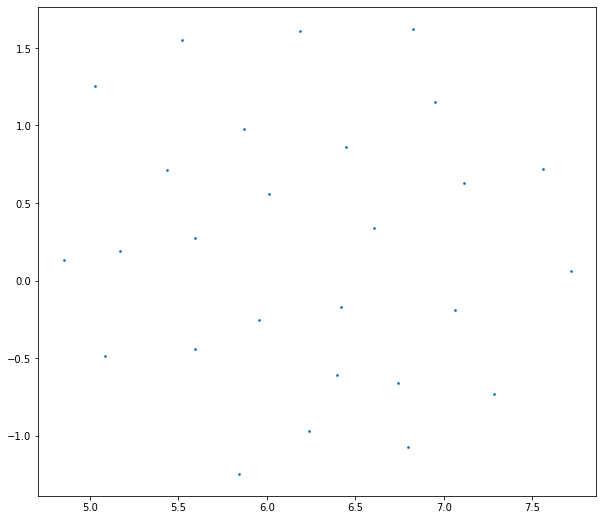

In [ ]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral');

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

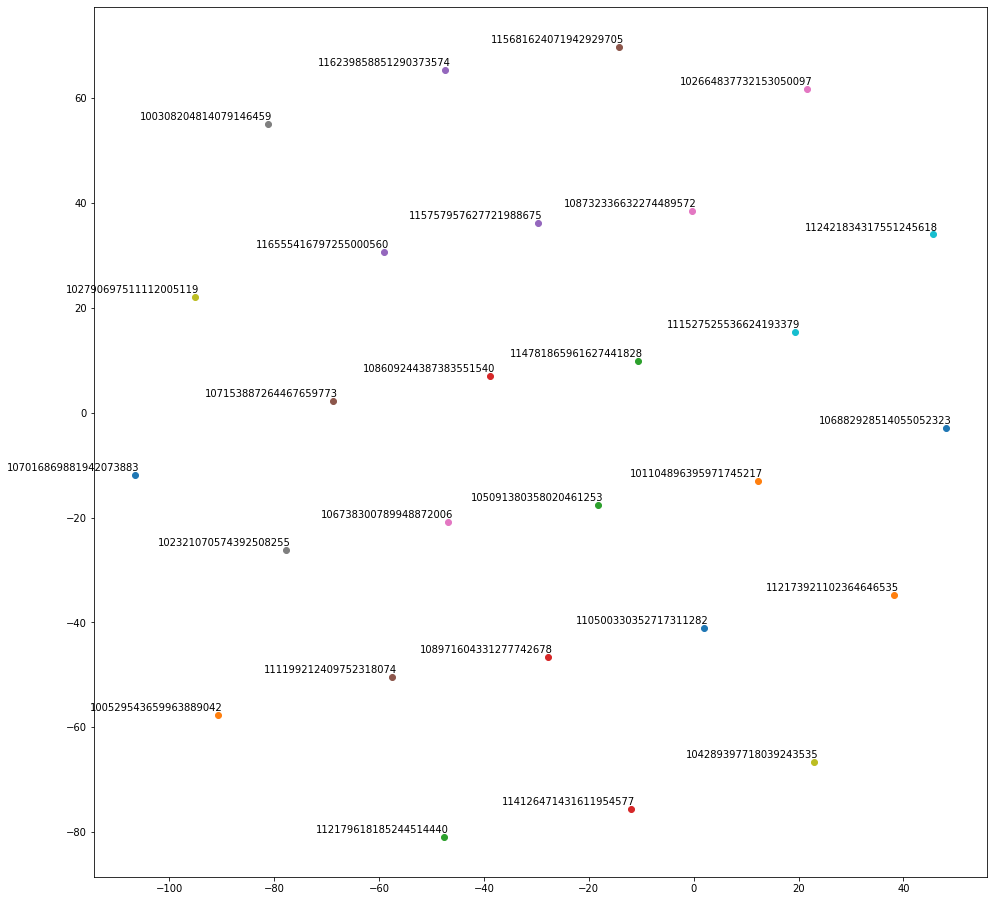

In [ ]:
tsne_plot(model)

In [ ]:
categories = train_df[["gPlusPlaceId", "categories"]]
categories.drop_duplicates(inplace=True, subset='gPlusPlaceId', keep="last")
categories_dict = categories.groupby('gPlusPlaceId')['categories'].apply(list).to_dict()
print(categories_dict)

{'100308204814079146459': ['department store'], '100529543659963889042': ['school'], '101104896395971745217': ['education'], '102321070574392508255': ['asian restaurant'], '102664837732153050097': ['advertising agency'], '102790697511112005119': ['restaurant'], '104289397718039243535': ['restaurant'], '105091380358020461253': ['chinese restaurant'], '106738300789948872006': [''], '106882928514055052323': ['international airport'], '107016869881942073883': ['movie theater'], '107153887264467659773': ['stadium'], '108609244387383551540': ['equipment rental agency'], '108732336632274489572': ['park'], '108971604331277742678': [''], '110500330352717311282': ['japanese restaurant'], '111199212409752318074': [''], '111527525536624193379': ['takeout restaurant'], '112173921102364646535': ['cafe'], '112179618185244514440': ['attraction'], '112421834317551245618': [''], '114126471431611954577': ['general contractor'], '114781865961627441828': ['mexican restaurant'], '115681624071942929705': ['a

**Recommendation based on word2vec model and recommeding similar categories**

In [ ]:
def similar_categories(v, n = 6):
    
    # extract most similar categories for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (categories_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        
     

In [ ]:
categories_train[0] = ' '.join([str(elem) for elem in categories_train[0]])

In [ ]:
similar_categories(model[categories_train[0]]) # pass vector of the places

[('equipment rental agency', 0.17399677634239197),
 ('restaurant', 0.16958746314048767),
 ('', 0.11345618963241577),
 ('', 0.11195143312215805),
 ('', 0.0970209464430809),
 ('stadium', 0.09381566941738129)]

In [ ]:
def aggregate_vectors(categories):
    categories_vec = []
    for i in categories:
        try:
            categories_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(categories_vec, axis=0)

In [ ]:
categories_val[0] = ' '.join([str(elem) for elem in categories_val[0]])

In [ ]:
aggregate_vectors(categories_val[0])

nan

**Recommendation based on reviews and place names**

In [ ]:
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df_places["processed_review"])
cosine_similarities = linear_kernel(matrix,matrix)
place_title = df_places['name']
indices = pd.Series(df_places.index, index=df_places['name'])

In [ ]:
def content_recommender(title):
    
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    
    places_indices = [i[0] for i in sim_scores]
    name = place_title.iloc[places_indices]
    
    return place_title.iloc[places_indices]

In [ ]:
content_recommender('sub depot').head()

1                       sub depot
12    maharaja restaurant and bar
13              hounslow tandoori
14      q restaurant and wine bar
15    tampa international airport
Name: name, dtype: object

In [ ]:
df_places.head()

,rating,reviewerName,reviewText,categories,gPlusPlaceId,unixReviewTime,reviewTime,gPlusUserId,name,price,...,hour,minute,second,review_length,sentiment,review_sentiment,processed_review,stemm_review,categories_processed,bag_of_words
0,3.000,jick li,no review,japanese restaurant,110500330352717311282,1375901666.000,2013-08-07,100000849267596620071,香港爭鮮外帶壽司-油塘店,$$,...,18.000,54.000,26.000,9,-0.296,Positive,review,review,japanese restaurant,japanese restaurant review
1,5.000,tyler houghton,no review,fast food restaurant,103714580490074430382,1394854209.000,2014-03-14,100001045668680522107,sub depot,$$,...,3.000,30.000,9.000,9,-0.296,Positive,review,review,fast food restaurant,fast food restaurant review
2,5.000,amalya gaziyeva,самая лучшая школа но питание нада улучшить...,education,101104896395971745217,1365577161.000,2013-04-09,100001120138879811669,частная школа парвоз,$$,...,6.000,59.000,21.000,46,0.000,Positive,,,education,education
3,2.000,chi ping liao,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,chinese restaurant,105091380358020461253,1333766072.000,2012-04-06,100001176398972193069,陳記狀元粥舖,$$,...,2.000,34.000,32.000,24,0.000,Negative,,,chinese restaurant,chinese restaurant
4,5.000,didy carlsons,i wouldn't waste a second recommending any oth...,general contractor,114126471431611954577,1380295370.000,2013-09-27,100001198443299553241,horizon homes & remodeling co inc,$$,...,15.000,22.000,50.000,413,0.983,Positive,wastesecondrecommendingkitchenremodelertony to...,wastesecondrecommendingkitchenremodelertoni to...,general contractor,general contractor wastesecondrecommendingkitc...


**Recommendation using KNN algorithm**

In [ ]:
df_new = df_places[['gPlusUserId','gPlusPlaceId','rating','reviewText','name']].copy()

In [ ]:
combine_places_rating = df_new.dropna(axis = 0, subset = ['name'])
places_ratingCount = (combine_places_rating.
     groupby(by = ['name'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['name', 'totalRatingCount']]
    )
places_ratingCount.head()


,name,totalRatingCount
0,big fuel communications,1
1,cleveland cavaliers,1
2,cookie's kitchen,1
3,dynamo donut & coffee,1
4,ebano café,1


In [ ]:
rating_with_totalRatingCount = combine_places_rating.merge(places_ratingCount, left_on = 'name', right_on = 'name', how = 'left')
rating_with_totalRatingCount.head()

,gPlusUserId,gPlusPlaceId,rating,reviewText,name,totalRatingCount
0,100000849267596620071,110500330352717311282,3.000,no review,香港爭鮮外帶壽司-油塘店,1
1,100001045668680522107,103714580490074430382,5.000,no review,sub depot,1
2,100001120138879811669,101104896395971745217,5.000,самая лучшая школа но питание нада улучшить...,частная школа парвоз,1
3,100001176398972193069,105091380358020461253,2.000,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,陳記狀元粥舖,1
4,100001198443299553241,114126471431611954577,5.000,i wouldn't waste a second recommending any oth...,horizon homes & remodeling co inc,1


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(places_ratingCount['totalRatingCount'].describe())

count   40.000
mean     1.000
std      0.000
min      1.000
25%      1.000
50%      1.000
75%      1.000
max      1.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularity_threshold = 1
rating_popular_place= rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_place.head()

,gPlusUserId,gPlusPlaceId,rating,reviewText,name,totalRatingCount
0,100000849267596620071,110500330352717311282,3.000,no review,香港爭鮮外帶壽司-油塘店,1
1,100001045668680522107,103714580490074430382,5.000,no review,sub depot,1
2,100001120138879811669,101104896395971745217,5.000,самая лучшая школа но питание нада улучшить...,частная школа парвоз,1
3,100001176398972193069,105091380358020461253,2.000,很多料加在同一碗粥裡，賣的很貴，但味道根本不搭。,陳記狀元粥舖,1
4,100001198443299553241,114126471431611954577,5.000,i wouldn't waste a second recommending any oth...,horizon homes & remodeling co inc,1


In [ ]:
places_features_df=rating_popular_place.pivot_table(index='name',columns='gPlusUserId',values='rating').fillna(0)
places_features_df.head()

gPlusUserId,100000849267596620071,100001045668680522107,100001120138879811669,100001176398972193069,100001198443299553241,100001312769136834086,100001498208653159507,100001608220446825169,100002025885689800480,100002422548155634137,...,100012150294651056876,100012673316747548067,100012799184161101041,100013729099572680462,100013881505265665932,100014354462672423179,100014523492454428966,100014655088126697770,100014792527301939900,100014808696256719518
name,,,,,,,,,,,,,,,,,,,,,
big fuel communications,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
cleveland cavaliers,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
cookie's kitchen,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
dynamo donut & coffee,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ebano café,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000


In [ ]:
from scipy.sparse import csr_matrix

place_features_df_matrix = csr_matrix(places_features_df.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(place_features_df_matrix)
print(places_features_df.shape[0])

40


In [ ]:
query_index = np.random.choice(places_features_df.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(places_features_df.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

3


In [ ]:
places_features_df.head()

gPlusUserId,100000849267596620071,100001045668680522107,100001120138879811669,100001176398972193069,100001198443299553241,100001312769136834086,100001498208653159507,100001608220446825169,100002025885689800480,100002422548155634137,...,100012150294651056876,100012673316747548067,100012799184161101041,100013729099572680462,100013881505265665932,100014354462672423179,100014523492454428966,100014655088126697770,100014792527301939900,100014808696256719518
name,,,,,,,,,,,,,,,,,,,,,
big fuel communications,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000
cleveland cavaliers,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
cookie's kitchen,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
dynamo donut & coffee,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
ebano café,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(places_features_df.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, places_features_df.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for dynamo donut & coffee:

1: sanford infiniti, with distance of 1.0:
2: q restaurant and wine bar, with distance of 1.0:
3: sub depot, with distance of 1.0:
4: shuler's restaurant, with distance of 1.0:
5: tiny tots senior secondary school, with distance of 1.0:


**Recommendation using SVD**

In [ ]:
df_svd = df_places[['gPlusUserId','gPlusPlaceId','rating']]
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(df_svd[['gPlusUserId','gPlusPlaceId','rating']], reader)
trainSet, testSet = train_test_split(data, test_size=.20, random_state=0)
algo = SVD(random_state=0)
algo.fit(trainSet)
predictions = algo.test(testSet)
print(predictions)

[Prediction(uid='100001498208653159507', iid='108635188508183406899', r_ui=5.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100008066355678629377', iid='102805389376187420838', r_ui=5.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100006553807417850183', iid='111199212409752318074', r_ui=4.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100005947076026260213', iid='108609244387383551540', r_ui=5.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100002422548155634137', iid='108732336632274489572', r_ui=5.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100014792527301939900', iid='107153887264467659773', r_ui=5.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100001176398972193069', iid='105091380358020461253', r_ui=2.0, est=4.09375, details={'was_impossible': False}), Prediction(uid='100000849267596620071', iid='110500330352717311282', r_ui=3.0, est=4.09375, details={'w

In [ ]:
def MAE(predictions):
        return accuracy.mae(predictions, verbose=False)
def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)
    
print("RMSE: ", RMSE(predictions))
print("MAE: ", MAE(predictions))

RMSE:  1.1008696846130335
MAE:  0.9765625


In [ ]:
def GetTopN(predictions, n=10, minimumRating=4.0):
    topN = defaultdict(list)
    for gPlusUserId, gPlusPlaceId, actualRating, estimatedRating, _ in predictions:
        if (estimatedRating >= minimumRating):
            topN[int(gPlusUserId)].append((int(gPlusPlaceId), estimatedRating))

    for userID, ratings in topN.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        topN[int(gPlusUserId)] = ratings[:n]

    return topN

In [ ]:
LOOCV = LeaveOneOut(n_splits=1, random_state=1)

for trainSet, testSet in LOOCV.split(data):
    # Train model without left-out ratings
    
    algo.fit(trainSet)
    # Predicts ratings for left-out ratings only
    
    leftOutPredictions = algo.test(testSet)
    # Build predictions for all ratings not in the training set
    bigTestSet = trainSet.build_anti_testset()
    allPredictions = algo.test(bigTestSet)
    # Compute top 10 recs for each user
    topNPredicted = GetTopN(allPredictions, n=10)

In [ ]:
def HitRate(topNPredicted, leftOutPredictions):
    hits = 0
    total = 0

 # For each left-out rating
    for leftOut in leftOutPredictions:
        gPlusUserId = leftOut[0]
        leftOutPlaceID = leftOut[1]
        # Is it in the predicted top 10 for this user?
        hit = False
        for gPlusPlaceId, predictedRating in topNPredicted[int(gPlusUserId)]:
            if (int(leftOutPlaceID) == int(gPlusPlaceId)):
                hit = True
                break
        if (hit) :
            hits += 1

        total += 1

    # Compute overall precision
    return hits/total
print("\nHit Rate: ", HitRate(topNPredicted, leftOutPredictions))


Hit Rate:  0.0


In [ ]:
kf = KFold(n_splits=5)
sim_options = {'name':'cosine'}
algo = KNNWithMeans(sim_options = sim_options)
best_algo = None
best_rmse = 1000.0
best_pred = None
for trainSet, testSet in kf.split(data):
    # train and test algorithm.
    algo.fit(trainSet)
    predictions = algo.test(testSet)
    # Compute and print Root Mean Squared Error
    rmse = accuracy.rmse(predictions, verbose=True)
    if rmse < best_rmse:
        best_algo = algo
        best_rmse= rmse
        best_pred = predictions
print(best_rmse)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0121
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.7196
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8484
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5515
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.1044
0.8483669975311392


In [ ]:
best_pred

[Prediction(uid='100014808696256719518', iid='102664837732153050097', r_ui=3.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='100005559409353659035', iid='112173921102364646535', r_ui=5.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='100005947076026260213', iid='108609244387383551540', r_ui=5.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='100006765738867846741', iid='106738300789948872006', r_ui=4.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='100010291864038208984', iid='104289397718039243535', r_ui=5.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='100014354462672423179', iid='112158661817437230817', r_ui=4.0, est=4.03125, details={'was_impossible': True, 'reason': 'User and/or i

In [ ]:
pred_df = pd.DataFrame(best_pred).merge(df_places , left_on = ['uid', 'iid'], right_on = ['gPlusUserId', 'gPlusPlaceId'])
pred_df[['uid', 'iid', 'gPlusUserId', 'gPlusPlaceId','rating','reviewerName','name']]

,uid,iid,gPlusUserId,gPlusPlaceId,rating,reviewerName,name
0,100014808696256719518,102664837732153050097,100014808696256719518,102664837732153050097,3.000,amber king,big fuel communications
1,100005559409353659035,112173921102364646535,100005559409353659035,112173921102364646535,5.000,chaitali rajveer,nahar hotels bangalore ooty coimbatore kotagiri
2,100005947076026260213,108609244387383551540,100005947076026260213,108609244387383551540,5.000,pedro pastor,rivolta ibérica auto moto y ciclo s.a.u.
3,100006765738867846741,106738300789948872006,100006765738867846741,106738300789948872006,4.000,kevin baget,jafra
4,100010291864038208984,104289397718039243535,100010291864038208984,104289397718039243535,5.000,hajime kamon,ブラブラブラ（ｂｌａｂｌａｂｌａ）
5,100014354462672423179,112158661817437230817,100014354462672423179,112158661817437230817,4.000,sevag manoukian,löwenbräu keller
6,100001312769136834086,111349535627765676111,100001312769136834086,111349535627765676111,5.000,ali gokcek,ehli kebap
7,100004520311858937835,106882928514055052323,100004520311858937835,106882928514055052323,5.000,keith wagar,tampa international airport
